In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.ensemble import VotingClassifier
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Load dataset
df = pd.read_csv('dataset_sdn.csv')

In [25]:
# Convert IP addresses to numerical representations
df['src'] = df['src'].apply(lambda x: '.'.join([str(int(i)) for i in x.split('.')]))
df['dst'] = df['dst'].apply(lambda x: '.'.join([str(int(i)) for i in x.split('.')]))

df['src'] = df['src'].apply(lambda x: sum([int(i) << (24 - 8 * n) for n, i in enumerate(x.split('.'))]))
df['dst'] = df['dst'].apply(lambda x: sum([int(i) << (24 - 8 * n) for n, i in enumerate(x.split('.'))]))

In [26]:
# Convert protocol and label to numerical representations
le = LabelEncoder()
df['Protocol'] = le.fit_transform(df['Protocol'])
df['label'] = le.fit_transform(df['label'])

In [27]:
# Define features (X) and target (y)
X = df.drop(['label'], axis=1)
y = df['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
# Machine Learning (ML) Model
ml_model = RandomForestClassifier(n_estimators=100)
ml_model.fit(X_train_scaled, y_train)

# Evaluate ML model
y_pred_ml = ml_model.predict(X_test_scaled)
print("ML Model Accuracy:", accuracy_score(y_test, y_pred_ml))
print("ML Model Classification Report:\n", classification_report(y_test, y_pred_ml))
print("ML Model Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ml))

ML Model Accuracy: 1.0
ML Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12722
           1       1.00      1.00      1.00      8147

    accuracy                           1.00     20869
   macro avg       1.00      1.00      1.00     20869
weighted avg       1.00      1.00      1.00     20869

ML Model Confusion Matrix:
 [[12722     0]
 [    0  8147]]


In [30]:
# Deep Learning (DL) Model
dl_model = Sequential()
dl_model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
dl_model.add(Dropout(0.2))
dl_model.add(Dense(32, activation='relu'))
dl_model.add(Dropout(0.2))
dl_model.add(Dense(1, activation='sigmoid'))
dl_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
dl_model.fit(X_train_scaled, y_train, epochs=20, batch_size=128, validation_data=(X_test_scaled, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
653/653 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6035 - loss: nan - val_accuracy: 0.6096 - val_loss: nan
Epoch 2/20
653/653 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6101 - loss: nan - val_accuracy: 0.6096 - val_loss: nan
Epoch 3/20
653/653 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6080 - loss: nan - val_accuracy: 0.6096 - val_loss: nan
Epoch 4/20
653/653 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6065 - loss: nan - val_accuracy: 0.6096 - val_loss: nan
Epoch 5/20
653/653 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6094 - loss: nan - val_accuracy: 0.6096 - val_loss: nan
Epoch 6/20
653/653 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6115 - loss: nan - val_accuracy: 0.6096 - val_loss: nan
Epoch 7/20
653/653 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6092 - loss: nan - val_accuracy: 0.6096 - val_loss: nan
Epoch 8/20
653/653 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6074 - loss: nan - val_accuracy: 0.6096 - val_loss: nan
Epoch 9/20
653/653 ━━━━━

In [31]:
# Evaluate DL model
loss, accuracy = dl_model.evaluate(X_test_scaled, y_test)
print("DL Model Accuracy:", accuracy)
print("DL Model Loss:", loss)

# Predict on test data
y_pred_dl = dl_model.predict(X_test_scaled)

653/653 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6092 - loss: nan
DL Model Accuracy: 0.6096123456954956
DL Model Loss: nan
653/653 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [32]:
# Convert predictions to binary (0 or 1)
y_pred_dl_binary = (y_pred_dl > 0.5).astype('int32')

# Replace NaN values with 0
y_pred_dl_binary = np.nan_to_num(y_pred_dl_binary)

print("DL Model Classification Report:\n", classification_report(y_test, y_pred_dl_binary))
print("DL Model Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dl_binary))

DL Model Classification Report:
               precision    recall  f1-score   support

           0       0.61      1.00      0.76     12722
           1       0.00      0.00      0.00      8147

    accuracy                           0.61     20869
   macro avg       0.30      0.50      0.38     20869
weighted avg       0.37      0.61      0.46     20869

DL Model Confusion Matrix:
 [[12722     0]
 [ 8147     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [33]:
# Predict on train data
ml_pred_train = ml_model.predict(X_train_scaled)
dl_pred_train = dl_model.predict(X_train_scaled).round()

2609/2609 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


In [34]:
ml_pred_train = ml_pred_train.reshape(-1)
dl_pred_train = dl_pred_train.reshape(-1)

In [35]:
# Combine predictions
hybrid_pred_train = np.mean([ml_pred_train,dl_pred_train],axis=0)

In [36]:
hybrid_pred_train = np.nan_to_num(hybrid_pred_train)

In [37]:
# Evaluate hybrid model on train data
print("Hybrid Model Train Accuracy:", accuracy_score(y_train, hybrid_pred_train.round()))
print("Hybrid Model Train Classification Report:\n", classification_report(y_train, hybrid_pred_train.round()))
print("Hybrid Model Train Confusion Matrix:\n", confusion_matrix(y_train, hybrid_pred_train.round()))


Hybrid Model Train Accuracy: 0.6090253486031914
Hybrid Model Train Classification Report:
               precision    recall  f1-score   support

           0       0.61      1.00      0.76     50839
           1       0.00      0.00      0.00     32637

    accuracy                           0.61     83476
   macro avg       0.30      0.50      0.38     83476
weighted avg       0.37      0.61      0.46     83476

Hybrid Model Train Confusion Matrix:
 [[50839     0]
 [32637     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [38]:
# Predict on test data
ml_pred_test = ml_model.predict(X_test_scaled)
dl_pred_test = dl_model.predict(X_test_scaled).round()

ml_pred_test = ml_pred_test.reshape(-1)
dl_pred_test = dl_pred_test.reshape(-1)

653/653 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [39]:
# Combine predictions
hybrid_pred_test = np.mean([ml_pred_test,dl_pred_test],axis=0)
hybrid_pred_test = np.nan_to_num(hybrid_pred_test)

In [40]:
# Evaluate hybrid model on test data
print("Hybrid Model Test Accuracy:", accuracy_score(y_test, hybrid_pred_test.round()))
print("Hybrid Model Test Classification Report:\n", classification_report(y_test, hybrid_pred_test.round()))
print("Hybrid Model Test Confusion Matrix:\n", confusion_matrix(y_test, hybrid_pred_test.round()))

Hybrid Model Test Accuracy: 0.6096123436676409
Hybrid Model Test Classification Report:
               precision    recall  f1-score   support

           0       0.61      1.00      0.76     12722
           1       0.00      0.00      0.00      8147

    accuracy                           0.61     20869
   macro avg       0.30      0.50      0.38     20869
weighted avg       0.37      0.61      0.46     20869

Hybrid Model Test Confusion Matrix:
 [[12722     0]
 [ 8147     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [43]:
# Define hybrid model
def hybrid_model(ml_pred, dl_pred):
    ml_pred = ml_pred.reshape(-1)
    dl_pred = dl_pred.reshape(-1)
    return np.mean([ml_pred,dl_pred],axis=0)

# Evaluate hybrid model
y_pred_hybrid = hybrid_model(ml_model.predict(X_test_scaled), dl_model.predict(X_test_scaled).round())
y_pred_hybrid = np.nan_to_num(y_pred_hybrid)

653/653 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [44]:
print("Hybrid Model Accuracy:", accuracy_score(y_test, y_pred_hybrid))
print("Hybrid Model Classification Report:\n", classification_report(y_test, y_pred_hybrid))
print("Hybrid Model Confusion Matrix:\n", confusion_matrix(y_test, y_pred_hybrid))

Hybrid Model Accuracy: 0.6096123436676409


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Hybrid Model Classification Report:
               precision    recall  f1-score   support

           0       0.61      1.00      0.76     12722
           1       0.00      0.00      0.00      8147

    accuracy                           0.61     20869
   macro avg       0.30      0.50      0.38     20869
weighted avg       0.37      0.61      0.46     20869

Hybrid Model Confusion Matrix:
 [[12722     0]
 [ 8147     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


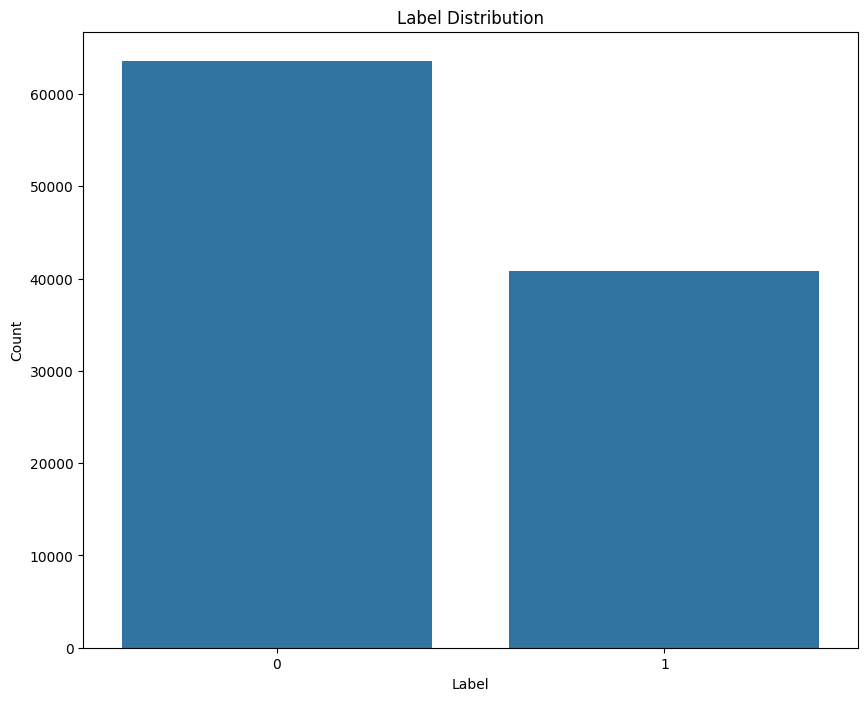

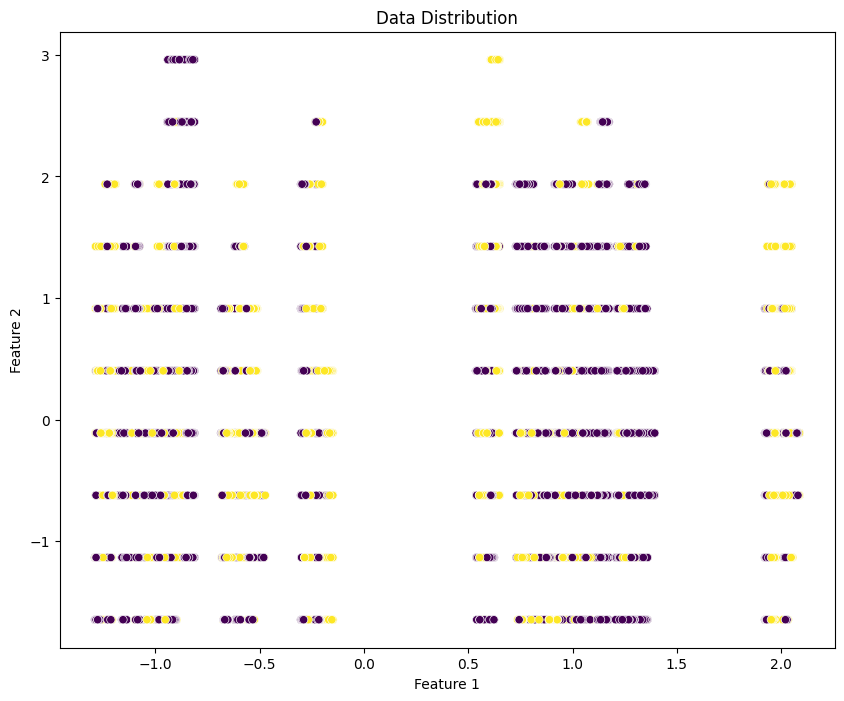

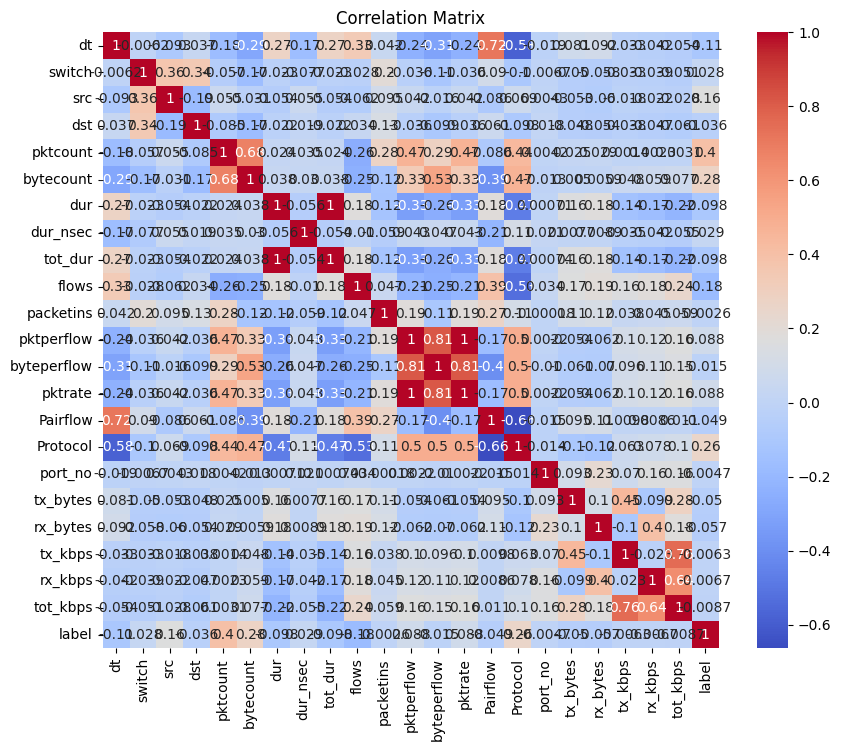

In [48]:
# Visualization
plt.figure(figsize=(10, 8))
sns.countplot(x='label', data=df)
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train_scaled[:, 0], y=X_train_scaled[:, 1], c=y_train)
plt.title('Data Distribution')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# plt.figure(figsize=(10, 8))
# # plt.plot(dl_model.history.history['accuracy'], label='Training Accuracy')
# # plt.plot(dl_model.history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

# plt.figure(figsize=(10, 8))
# plt.plot(dl_model.history.history['loss'], label='Training Loss')
# plt.plot(dl_model.history.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [73]:
# Real-Time DDoS Detection
def detect_ddos(ml_model, dl_model, scaler, traffic_data):
    traffic_data_scaled = scaler.transform(traffic_data.reshape(-1, traffic_data.shape[-1]))
    ml_pred = ml_model.predict(traffic_data_scaled)
    dl_pred = dl_model.predict(traffic_data_scaled).round()
    ml_pred = ml_pred.reshape(-1)
    dl_pred = dl_pred.reshape(-1)
    prediction = np.mean([ml_pred, dl_pred], axis=0)
    prediction = np.nan_to_num(prediction)
    return prediction


In [74]:
# Example usage
traffic_data = pd.DataFrame({
    'dt': [1],
    'switch': [1],
    'src': [1],
    'dst': [1],
    'pktcount': [10],
    'bytecount': [1000],
    'dur': [10],
    'dur_nsec': [100],
    'tot_dur': [100],
    'flows': [1],
    'packetins': [10],
    'pktperflow': [10],
    'byteperflow': [100],
    'pktrate': [10],
    'Pairflow': [1],
    'Protocol': [1],
    'port_no': [80],
    'tx_bytes': [1000],
    'rx_bytes': [1000],
    'tx_kbps': [100],
    'rx_kbps': [100],
    'tot_kbps': [200]
})



In [75]:
# Convert IP addresses to numerical representations
import ipaddress
traffic_data['src'] = traffic_data['src'].apply(lambda x: int(ipaddress.IPv4Address(x)))
traffic_data['dst'] = traffic_data['dst'].apply(lambda x: int(ipaddress.IPv4Address(x)))


In [77]:
# Convert protocol to numerical representation
le = LabelEncoder()
traffic_data['Protocol'] = le.fit_transform(traffic_data['Protocol'])
# Convert to numpy array
traffic_data = traffic_data.to_numpy()

prediction = detect_ddos(ml_model, dl_model, scaler, traffic_data)
print("DDoS Detection:",prediction)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
DDoS Detection: [0.]


In [80]:
# Save models for future use
with open('ml_model.pkl', 'wb') as f:
    pickle.dump(ml_model, f)

with open('dl_model.pkl', 'wb') as f:
    pickle.dump(dl_model, f)

with open('hybrid_model.pkl', 'wb') as f:
    pickle.dump(hybrid_model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)



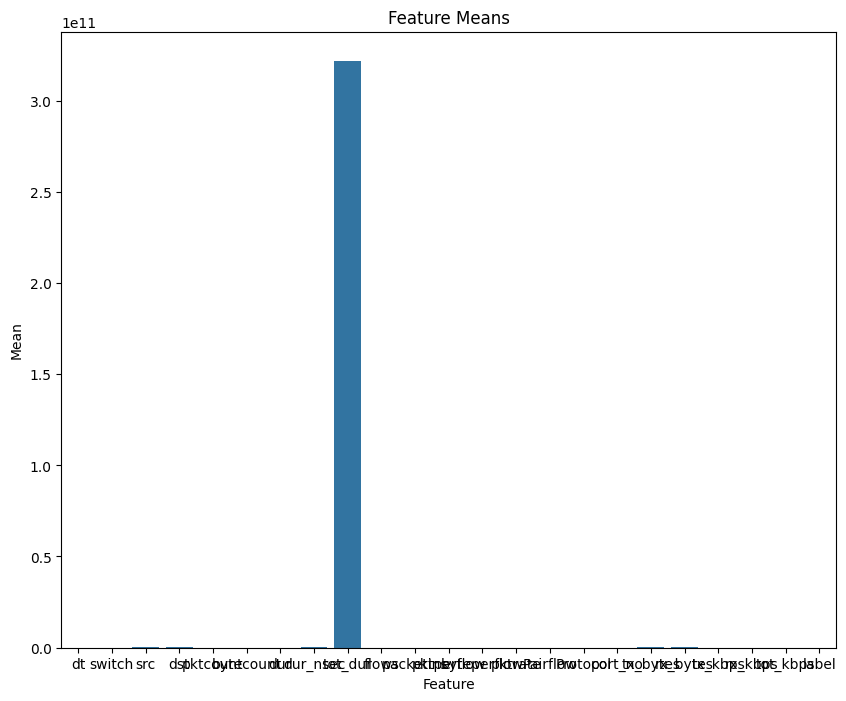

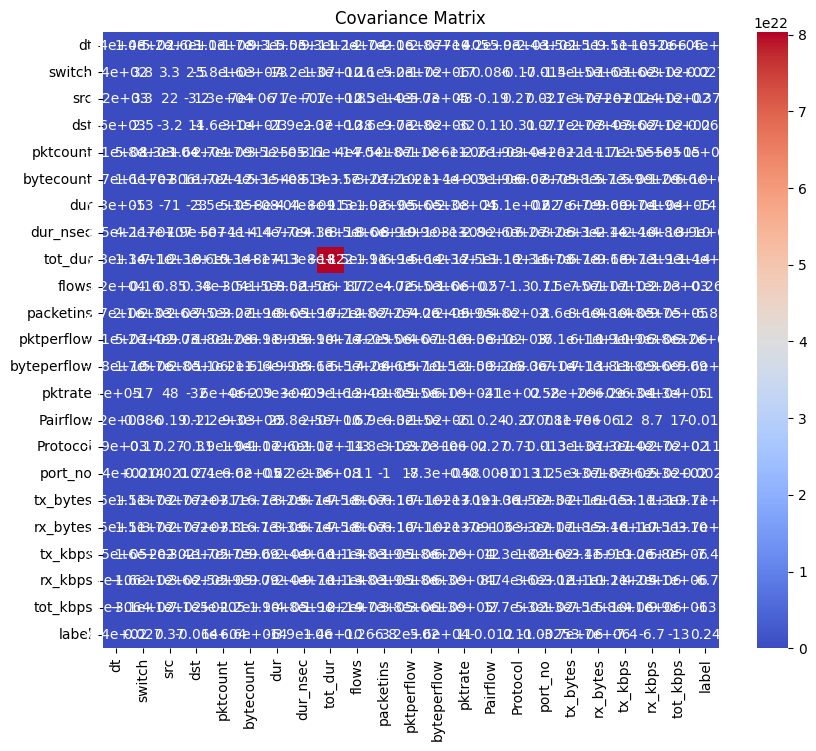

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


<Figure size 1000x800 with 0 Axes>

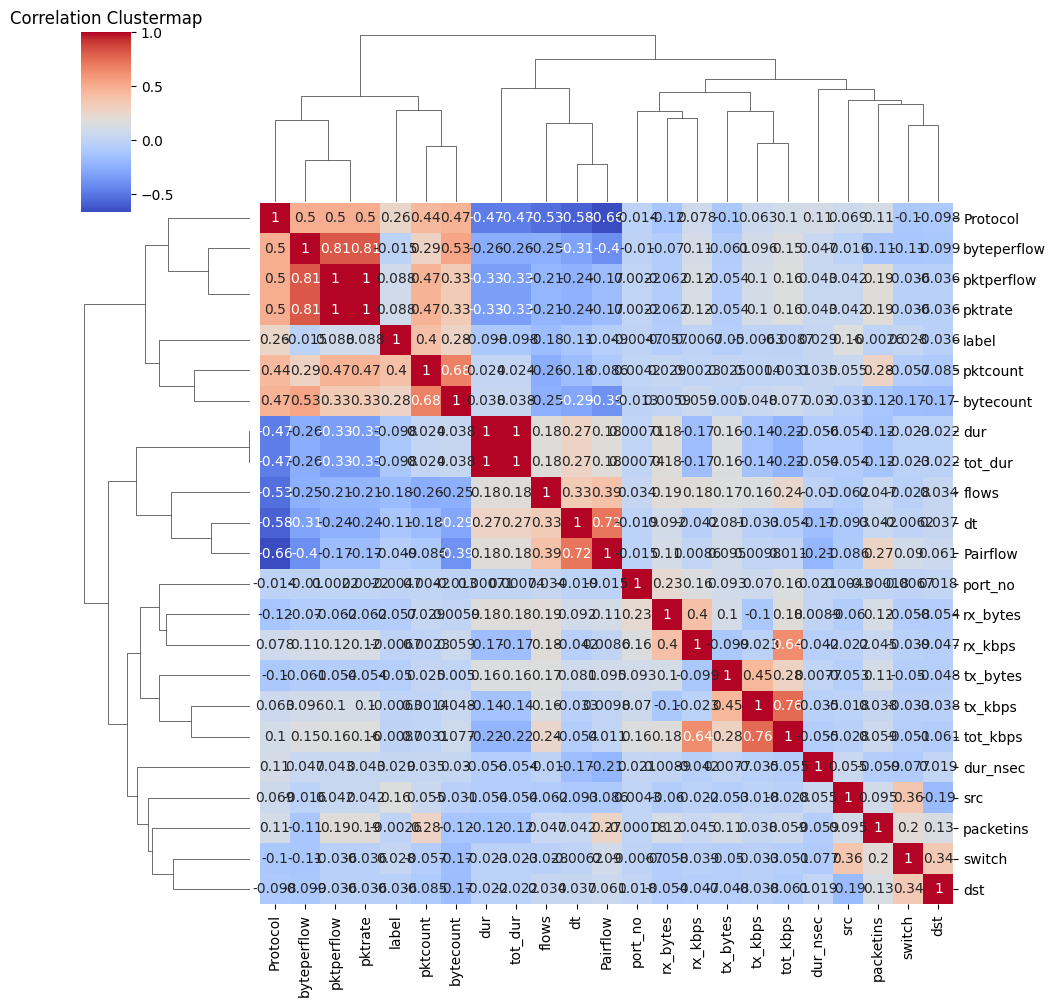

In [81]:
# Additional visualizations
plt.figure(figsize=(10, 8))
sns.barplot(x=df.columns, y=df.mean())
plt.title('Feature Means')
plt.xlabel('Feature')
plt.ylabel('Mean')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.cov(), annot=True, cmap='coolwarm', square=True)
plt.title('Covariance Matrix')
plt.show()

plt.figure(figsize=(10, 8))
sns.clustermap(df.corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Clustermap')
plt.show()